In [30]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('susdat_2022-06-20-161133.csv')

C:\Users\fyang\Anaconda3\envs\my-rdkit-env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,5,6,9,10,11,12,13,15,18,19,20,21,22,23,30,32,33,35,38,41,44,46,47,48,49,50,51,57,61,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
df.dropna(subset=['SMILES'],inplace=True)

In [33]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit import DataStructs

In [34]:
df['mols'] = [Chem.MolFromSmiles (x) for x in df.SMILES]

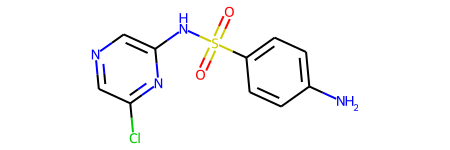

In [35]:
df['mols'][0]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101948 entries, 0 to 107243
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Norman_SusDat_ID                             101948 non-null  object 
 1   Name                                         101948 non-null  object 
 2   Name_Dashboard                               34318 non-null   object 
 3   Name_ChemSpider                              38379 non-null   object 
 4   Name_IUPAC                                   55894 non-null   object 
 5   Synonyms_ChemSpider                          38367 non-null   object 
 6   Reliability_of_Synonyms_ChemSpider           38266 non-null   object 
 7   CAS_RN                                       86812 non-null   object 
 8   CAS_RN_Dashboard                             33268 non-null   object 
 9   CAS_RN_PubChem                               34092 non-null

In [38]:
df.dropna(subset = ['mols'],inplace = True)

In [39]:
df['FPs'] = [Chem.RDKFingerprint (x, fpSize = 1024) for x in df.mols]

In [41]:
df['FPs']

0         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ...
1         [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...
2         [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...
4         [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, ...
                                ...                        
107238    [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, ...
107239    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...
107240    [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
107242    [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...
107243    [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...
Name: FPs, Length: 101684, dtype: object

In [23]:
import joblib
import os
import glob

path = os.getcwd()
model_files = glob.glob(os.path.join(path, "*.joblib"))

models = []
for f in model_files:
    model = joblib.load(f)
    models.append(model)

In [24]:
model_files

['C:\\Users\\fyang\\CCS-Prediction\\allCCS_prediction.joblib',
 'C:\\Users\\fyang\\CCS-Prediction\\Benzenoids_GridR.joblib',
 'C:\\Users\\fyang\\CCS-Prediction\\classifier_prediction.joblib',
 'C:\\Users\\fyang\\CCS-Prediction\\Lipids and lipid-like molecules_GridR.joblib',
 'C:\\Users\\fyang\\CCS-Prediction\\Organic acids and derivatives_GridR.joblib',
 'C:\\Users\\fyang\\CCS-Prediction\\Organic oxygen compounds_GridR.joblib',
 'C:\\Users\\fyang\\CCS-Prediction\\Organoheterocyclic compounds_GridR.joblib']

In [25]:
model_class = models[2]

In [26]:
model_class

GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=[True]), n_jobs=3,
             param_grid={'min_samples_leaf': [5, 7, 10, 12, 15],
                         'n_estimators': [100, 125, 150, 175, 200]},
             return_train_score=True, verbose=2)

In [31]:
FPs_Prediction = df['FPs'].to_list()
SC_pred = model_class.predict(FPs_Prediction)
df.loc[:,'Super_Class'] = SC_pred

C:\Users\fyang\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
df

,Norman_SusDat_ID,Name,Name_Dashboard,Name_ChemSpider,Name_IUPAC,Synonyms_ChemSpider,Reliability_of_Synonyms_ChemSpider,CAS_RN,CAS_RN_Dashboard,CAS_RN_PubChem,...,Pred. Ionization source,Prob. both ESI mode,Prob. +ESI,Prob. -ESI,Pred. ESI mode,Preferable Platform by decision Tree,Synonyms,mols,FPs,Super_Class
0,NS00000001,Sulfaclozine,Sulfaclozine,Sulfaclozine,4-amino-N-(6-chloropyrazin-2-yl)benzenesulfona...,N~1~-(6-chloropyrazinyl)sulfanilamide;4-amino-...,4;4;4;3;2;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,CAS_RN: 102-65-8,102-65-8,102-65-8;27890-59-1,...,ESI,0.928,0.058,0.014,Both Polarities,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ...",Benzenoids
1,NS00000002,Sulfachloropyridazine,Sulfachloropyridazine,sulfachlorpyridazine,4-amino-N-(6-chloropyridazin-3-yl)benzenesulfo...,Prinzone;4-amino-N-(6-chloropyridazin-3-yl)ben...,4;4;4;4;4;4;4;4;4;3;2;2;1;1;1;1;0;0;0;0;0;0;0;...,CAS_RN: 80-32-0,80-32-0,80-32-0,...,ESI,0.120,0.873,0.007,Positive ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...",Benzenoids
2,NS00000003,Sulfaguanidine,Sulfaguanidine,sulfaguanidine,2-(4-aminophenyl)sulfonylguanidine,sulfaguanidine;Sulfanilyl guanadine;Solfaguani...,6;4;4;2;2;2;2;2;2;2;2;2;2;1;1;1;1;1;1;0;0;0;0;...,CAS_RN: 57-67-0,57-67-0,57-67-0;61116-95-8,...,ESI,0.000,1.000,0.000,Positive ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",Benzenoids
3,NS00000004,Sulfamerazine,Sulfamerazine,sulfamerazine,4-amino-N-(4-methylpyrimidin-2-yl)benzenesulfo...,sulfamerazine;sulfamerazine sodium;Sulfamerazi...,6;4;4;4;4;2;2;2;2;2;2;2;2;2;2;2;2;1;1;0;0;0;0;...,CAS_RN: 127-79-7,127-79-7,127-79-7;99482-27-6,...,ESI,0.906,0.092,0.002,Both Polarities,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...",Benzenoids
4,NS00000005,Sulfamethizole,Sulfamethizole,Sulfamethizole,"4-amino-N-(5-methyl-1,3,4-thiadiazol-2-yl)benz...",Sulfamethizole;Sulfamethizole [USAN:INN:JAN];S...,6;4;4;4;3;3;3;2;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;...,CAS_RN: 144-82-1,144-82-1,144-82-1,...,ESI,0.032,0.968,0.001,Positive ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, ...",Benzenoids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107238,NS00117948,"1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...","1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...",NaN,NaN,NaN,NaN,CAS_RN: 59467-64-0,59467-64-0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, ...",Organoheterocyclic compounds
107239,NS00117949,Noscapine,NaN,NaN,NaN,NaN,NaN,CAS_RN: 128-62-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",Organoheterocyclic compounds
107240,NS00117950,Perfluorodecyl phosphate (8 2PAP),NaN,NaN,NaN,NaN,NaN,CAS_RN: 57678-03-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",Organic acids and derivatives
107242,NS00117952,Perindopril,NaN,NaN,NaN,NaN,NaN,CAS_RN: 82834-16-0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...",Organic acids and derivatives


In [33]:
df['Super_Class'].value_counts()

Benzenoids                         29712
Organoheterocyclic compounds       26940
Organic acids and derivatives      24890
Lipids and lipid-like molecules    17748
Organic oxygen compounds            2394
Name: Super_Class, dtype: int64

In [38]:
gb = df.groupby('Super_Class')    
l_gb = [gb.get_group(x) for x in gb.groups]

In [37]:
Pred_CCS = models[0].predict(FPs_Prediction)
df.loc[:,'Pred_CCS(direct)'] = Pred_CCS

C:\Users\fyang\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
l_gb[3]

,Norman_SusDat_ID,Name,Name_Dashboard,Name_ChemSpider,Name_IUPAC,Synonyms_ChemSpider,Reliability_of_Synonyms_ChemSpider,CAS_RN,CAS_RN_Dashboard,CAS_RN_PubChem,...,Prob. both ESI mode,Prob. +ESI,Prob. -ESI,Pred. ESI mode,Preferable Platform by decision Tree,Synonyms,mols,FPs,Super_Class,Pred_CCS(direct)
134,NS00000145,Fumonisin B1,Fumonisin B1,FB1,"2-[2-[19-amino-6-(3,4-dicarboxybutanoyloxy)-11...","2,2'-{(19-amino-11,16,18-trihydroxy-5,9-dimeth...",4;4;4;4;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0,CAS_RN: 116355-83-0,116355-83-0,116355-83-0,...,0.999,0.000,0.001,Both Polarities,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...",Organic oxygen compounds,259.762570
135,NS00000146,Fumonisin B2,Fumonisin B2,"2,2'-{(19-Amino-16,18-dihydroxy-5,9-dimethyl-6...","2-[2-[19-amino-6-(3,4-dicarboxybutanoyloxy)-16...","2,2'-{(19-Amino-16,18-dihydroxy-5,9-dimethyl-6...",1;1;0;0;0;0;0;0;0;0,CAS_RN: 116355-84-1,NaN,116355-84-1,...,0.999,0.000,0.001,Both Polarities,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...",Organic oxygen compounds,259.511498
142,NS00000153,HT-2 Toxin,HT-2 Toxin,"(3alpha,4beta,8alpha,12R)-15-Acetoxy-3,4-dihyd...","15-(Acetyloxy)-3alpha,4beta-dihydroxy-12,13-ep...","Butanoic acid, 3-methyl-, (2alpha,3alpha,4beta...",1;1;1;1;0;0;0;0;0;0;0;0;0;0;0,CAS_RN: 26934-87-2,26934-87-2,26934-87-2,...,0.068,0.448,0.484,Negative ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",Organic oxygen compounds,256.303890
149,NS00000161,Josamycin,Josamycin,Josamycin,"(2S,3R,4R,6S)-6-{[(2R,3S,4R,5R,6S)-6-{[(4R,6S,...","Kitasamycin;(2S,3S,4R,6S)-6-{[(2R,3S,4R,5R,6S)...",6;4;4;4;3;2;2;2;2;2;2;2;1;1;0;0;0;0;0;0;0;0;0;...,CAS_RN: 16846-24-5,16846-24-5,16846-24-5;56689-45-3;11033-18-4;35414-05-2;39...,...,0.003,0.997,0.000,Positive ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...",Organic oxygen compounds,298.211696
150,NS00000162,Maduramicine,NaN,MADURAMICIN ACID,"2-[(2R,3S,4S,5R,6S)-6-[(1R)-1-[(2S,5R,7S,8R,9S...","[(2R,3S,4S,5R,6S)-6-{(1R)-1-[(2S,5R,7S,8R,9S)-...",1;1;0;0;0;0;0;0;0;0;0;0,CAS_RN: 79356-08-4,NaN,79356-08-4,...,NaN,NaN,NaN,NaN,NaN,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...",Organic oxygen compounds,241.187427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107068,NS00117775,"(2S,3S,4S,5R)-6-[(2,4-dimethyl-3-oxo-2-bicyclo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...",Organic oxygen compounds,187.930364
107084,NS00117791,"(2S,3S,4S,5R)-3,4,5-trihydroxy-6-(4-phenyldiaz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, ...",Organic oxygen compounds,190.334507
107094,NS00117801,hyocholic acid 6-O-glucuronide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, ...",Organic oxygen compounds,217.507409
107154,NS00117861,Desogestrel 17-O-glucuronide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...",Organic oxygen compounds,237.420999


In [48]:
FPs_class = l_gb[4]['FPs'].to_list()
Pred_CCS =  models[6].predict(FPs_class)
l_gb[4].loc[:,'Pred_CCS(Class based)'] = Pred_CCS

C:\Users\fyang\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [49]:
df_copy = pd.concat(l_gb)

In [50]:
df_copy

,Norman_SusDat_ID,Name,Name_Dashboard,Name_ChemSpider,Name_IUPAC,Synonyms_ChemSpider,Reliability_of_Synonyms_ChemSpider,CAS_RN,CAS_RN_Dashboard,CAS_RN_PubChem,...,Prob. +ESI,Prob. -ESI,Pred. ESI mode,Preferable Platform by decision Tree,Synonyms,mols,FPs,Super_Class,Pred_CCS(direct),Pred_CCS(Class based)
0,NS00000001,Sulfaclozine,Sulfaclozine,Sulfaclozine,4-amino-N-(6-chloropyrazin-2-yl)benzenesulfona...,N~1~-(6-chloropyrazinyl)sulfanilamide;4-amino-...,4;4;4;3;2;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,CAS_RN: 102-65-8,102-65-8,102-65-8;27890-59-1,...,0.058,0.014,Both Polarities,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ...",Benzenoids,159.285316,162.091939
1,NS00000002,Sulfachloropyridazine,Sulfachloropyridazine,sulfachlorpyridazine,4-amino-N-(6-chloropyridazin-3-yl)benzenesulfo...,Prinzone;4-amino-N-(6-chloropyridazin-3-yl)ben...,4;4;4;4;4;4;4;4;4;3;2;2;1;1;1;1;0;0;0;0;0;0;0;...,CAS_RN: 80-32-0,80-32-0,80-32-0,...,0.873,0.007,Positive ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...",Benzenoids,158.772242,158.953665
2,NS00000003,Sulfaguanidine,Sulfaguanidine,sulfaguanidine,2-(4-aminophenyl)sulfonylguanidine,sulfaguanidine;Sulfanilyl guanadine;Solfaguani...,6;4;4;2;2;2;2;2;2;2;2;2;2;1;1;1;1;1;1;0;0;0;0;...,CAS_RN: 57-67-0,57-67-0,57-67-0;61116-95-8,...,1.000,0.000,Positive ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",Benzenoids,161.984186,150.905597
3,NS00000004,Sulfamerazine,Sulfamerazine,sulfamerazine,4-amino-N-(4-methylpyrimidin-2-yl)benzenesulfo...,sulfamerazine;sulfamerazine sodium;Sulfamerazi...,6;4;4;4;4;2;2;2;2;2;2;2;2;2;2;2;2;1;1;0;0;0;0;...,CAS_RN: 127-79-7,127-79-7,127-79-7;99482-27-6,...,0.092,0.002,Both Polarities,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...",Benzenoids,159.233409,158.333090
4,NS00000005,Sulfamethizole,Sulfamethizole,Sulfamethizole,"4-amino-N-(5-methyl-1,3,4-thiadiazol-2-yl)benz...",Sulfamethizole;Sulfamethizole [USAN:INN:JAN];S...,6;4;4;4;3;3;3;2;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;...,CAS_RN: 144-82-1,144-82-1,144-82-1,...,0.968,0.001,Positive ESI,RPLC_+ESI,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, ...",Benzenoids,153.552835,155.017066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107235,NS00117944,N-[(6-Chloro-3-pyridinyl)methyl]-N'-cyano-N-me...,N-[(6-Chloro-3-pyridinyl)methyl]-N'-cyano-N-me...,NaN,NaN,NaN,NaN,CAS_RN: 160430-64-8,160430-64-8,NaN,...,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, ...",Organoheterocyclic compounds,152.038538,151.553453
107237,NS00117947,Iopamidol,NaN,NaN,NaN,NaN,NaN,CAS_RN: 60208-45-9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, ...",Organoheterocyclic compounds,209.871580,206.374302
107238,NS00117948,"1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...","1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...",NaN,NaN,NaN,NaN,CAS_RN: 59467-64-0,59467-64-0,NaN,...,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, ...",Organoheterocyclic compounds,171.362874,171.429921
107239,NS00117949,Noscapine,NaN,NaN,NaN,NaN,NaN,CAS_RN: 128-62-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"<img data-content=""rdkit/molecule"" src=""data:i...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",Organoheterocyclic compounds,196.366089,194.204828


In [51]:
df_copy.drop(['mols','FPs'], axis=1, inplace=True)

In [52]:
df_copy.to_csv('susdat_CCSprediction.csv', index=False)

In [3]:
df_copy = pd.read_csv('susdat_CCSprediction.csv')

C:\Users\fyang\Anaconda3\envs\my-rdkit-env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,5,6,10,11,12,13,22,23,33,35,46,47,48,49,51,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_copy

,Norman_SusDat_ID,Name,Name_Dashboard,Name_ChemSpider,Name_IUPAC,Synonyms_ChemSpider,Reliability_of_Synonyms_ChemSpider,CAS_RN,CAS_RN_Dashboard,CAS_RN_PubChem,...,Pred. Ionization source,Prob. both ESI mode,Prob. +ESI,Prob. -ESI,Pred. ESI mode,Preferable Platform by decision Tree,Synonyms,Super_Class,Pred_CCS(direct),Pred_CCS(Class based)
0,NS00000001,Sulfaclozine,Sulfaclozine,Sulfaclozine,4-amino-N-(6-chloropyrazin-2-yl)benzenesulfona...,N~1~-(6-chloropyrazinyl)sulfanilamide;4-amino-...,4;4;4;3;2;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,CAS_RN: 102-65-8,102-65-8,102-65-8;27890-59-1,...,ESI,0.928,0.058,0.014,Both Polarities,RPLC_+ESI,0,Benzenoids,159.285316,162.091939
1,NS00000002,Sulfachloropyridazine,Sulfachloropyridazine,sulfachlorpyridazine,4-amino-N-(6-chloropyridazin-3-yl)benzenesulfo...,Prinzone;4-amino-N-(6-chloropyridazin-3-yl)ben...,4;4;4;4;4;4;4;4;4;3;2;2;1;1;1;1;0;0;0;0;0;0;0;...,CAS_RN: 80-32-0,80-32-0,80-32-0,...,ESI,0.120,0.873,0.007,Positive ESI,RPLC_+ESI,0,Benzenoids,158.772242,158.953665
2,NS00000003,Sulfaguanidine,Sulfaguanidine,sulfaguanidine,2-(4-aminophenyl)sulfonylguanidine,sulfaguanidine;Sulfanilyl guanadine;Solfaguani...,6;4;4;2;2;2;2;2;2;2;2;2;2;1;1;1;1;1;1;0;0;0;0;...,CAS_RN: 57-67-0,57-67-0,57-67-0;61116-95-8,...,ESI,0.000,1.000,0.000,Positive ESI,RPLC_+ESI,0,Benzenoids,161.984186,150.905597
3,NS00000004,Sulfamerazine,Sulfamerazine,sulfamerazine,4-amino-N-(4-methylpyrimidin-2-yl)benzenesulfo...,sulfamerazine;sulfamerazine sodium;Sulfamerazi...,6;4;4;4;4;2;2;2;2;2;2;2;2;2;2;2;2;1;1;0;0;0;0;...,CAS_RN: 127-79-7,127-79-7,127-79-7;99482-27-6,...,ESI,0.906,0.092,0.002,Both Polarities,RPLC_+ESI,0,Benzenoids,159.233409,158.333090
4,NS00000005,Sulfamethizole,Sulfamethizole,Sulfamethizole,"4-amino-N-(5-methyl-1,3,4-thiadiazol-2-yl)benz...",Sulfamethizole;Sulfamethizole [USAN:INN:JAN];S...,6;4;4;4;3;3;3;2;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;...,CAS_RN: 144-82-1,144-82-1,144-82-1,...,ESI,0.032,0.968,0.001,Positive ESI,RPLC_+ESI,0,Benzenoids,153.552835,155.017066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101679,NS00117944,N-[(6-Chloro-3-pyridinyl)methyl]-N'-cyano-N-me...,N-[(6-Chloro-3-pyridinyl)methyl]-N'-cyano-N-me...,NaN,NaN,NaN,NaN,CAS_RN: 160430-64-8,160430-64-8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,152.038538,151.553453
101680,NS00117947,Iopamidol,NaN,NaN,NaN,NaN,NaN,CAS_RN: 60208-45-9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,209.871580,206.374302
101681,NS00117948,"1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...","1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...",NaN,NaN,NaN,NaN,CAS_RN: 59467-64-0,59467-64-0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,171.362874,171.429921
101682,NS00117949,Noscapine,NaN,NaN,NaN,NaN,NaN,CAS_RN: 128-62-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,196.366089,194.204828


In [5]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101684 entries, 0 to 101683
Data columns (total 71 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Norman_SusDat_ID                             101684 non-null  object 
 1   Name                                         101684 non-null  object 
 2   Name_Dashboard                               34276 non-null   object 
 3   Name_ChemSpider                              38341 non-null   object 
 4   Name_IUPAC                                   55792 non-null   object 
 5   Synonyms_ChemSpider                          38333 non-null   object 
 6   Reliability_of_Synonyms_ChemSpider           38232 non-null   object 
 7   CAS_RN                                       86613 non-null   object 
 8   CAS_RN_Dashboard                             33242 non-null   object 
 9   CAS_RN_PubChem                               34072 non-null

In [9]:
df_copy['differ'] = x-y

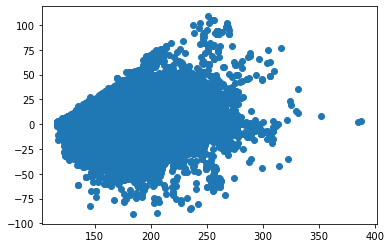

In [10]:
x = df_copy['Pred_CCS(direct)']
y = df_copy['differ']
plt.scatter(x,y)

<AxesSubplot:xlabel='Pred_CCS(direct)', ylabel='differ'>

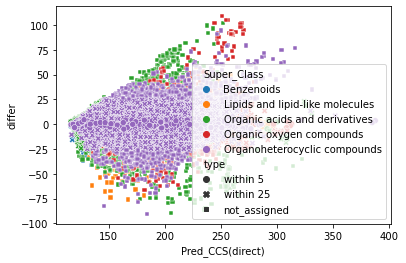

In [26]:
sns.scatterplot(data=df_copy, x="Pred_CCS(direct)", y="differ",hue="Super_Class", style="type")

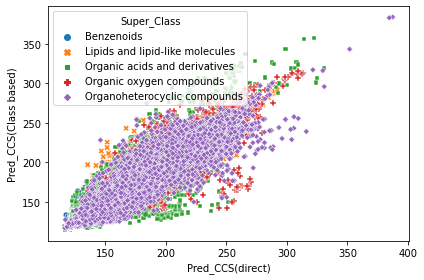

In [29]:
sns.scatterplot(data=df_copy, x="Pred_CCS(direct)", y="Pred_CCS(Class based)", hue="Super_Class", style="Super_Class")
plt.tight_layout()

In [16]:
df_copy['type'] = np.where(np.abs(df_copy['differ'])<5, 'within 5',
               np.where(np.abs(df_copy['differ'])<25, 'within 25', 'not_assigned'))

In [17]:
df_copy

,Norman_SusDat_ID,Name,Name_Dashboard,Name_ChemSpider,Name_IUPAC,Synonyms_ChemSpider,Reliability_of_Synonyms_ChemSpider,CAS_RN,CAS_RN_Dashboard,CAS_RN_PubChem,...,Prob. +ESI,Prob. -ESI,Pred. ESI mode,Preferable Platform by decision Tree,Synonyms,Super_Class,Pred_CCS(direct),Pred_CCS(Class based),differ,type
0,NS00000001,Sulfaclozine,Sulfaclozine,Sulfaclozine,4-amino-N-(6-chloropyrazin-2-yl)benzenesulfona...,N~1~-(6-chloropyrazinyl)sulfanilamide;4-amino-...,4;4;4;3;2;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,CAS_RN: 102-65-8,102-65-8,102-65-8;27890-59-1,...,0.058,0.014,Both Polarities,RPLC_+ESI,0,Benzenoids,159.285316,162.091939,-2.806623,within 5
1,NS00000002,Sulfachloropyridazine,Sulfachloropyridazine,sulfachlorpyridazine,4-amino-N-(6-chloropyridazin-3-yl)benzenesulfo...,Prinzone;4-amino-N-(6-chloropyridazin-3-yl)ben...,4;4;4;4;4;4;4;4;4;3;2;2;1;1;1;1;0;0;0;0;0;0;0;...,CAS_RN: 80-32-0,80-32-0,80-32-0,...,0.873,0.007,Positive ESI,RPLC_+ESI,0,Benzenoids,158.772242,158.953665,-0.181424,within 5
2,NS00000003,Sulfaguanidine,Sulfaguanidine,sulfaguanidine,2-(4-aminophenyl)sulfonylguanidine,sulfaguanidine;Sulfanilyl guanadine;Solfaguani...,6;4;4;2;2;2;2;2;2;2;2;2;2;1;1;1;1;1;1;0;0;0;0;...,CAS_RN: 57-67-0,57-67-0,57-67-0;61116-95-8,...,1.000,0.000,Positive ESI,RPLC_+ESI,0,Benzenoids,161.984186,150.905597,11.078590,within 25
3,NS00000004,Sulfamerazine,Sulfamerazine,sulfamerazine,4-amino-N-(4-methylpyrimidin-2-yl)benzenesulfo...,sulfamerazine;sulfamerazine sodium;Sulfamerazi...,6;4;4;4;4;2;2;2;2;2;2;2;2;2;2;2;2;1;1;0;0;0;0;...,CAS_RN: 127-79-7,127-79-7,127-79-7;99482-27-6,...,0.092,0.002,Both Polarities,RPLC_+ESI,0,Benzenoids,159.233409,158.333090,0.900319,within 5
4,NS00000005,Sulfamethizole,Sulfamethizole,Sulfamethizole,"4-amino-N-(5-methyl-1,3,4-thiadiazol-2-yl)benz...",Sulfamethizole;Sulfamethizole [USAN:INN:JAN];S...,6;4;4;4;3;3;3;2;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;...,CAS_RN: 144-82-1,144-82-1,144-82-1,...,0.968,0.001,Positive ESI,RPLC_+ESI,0,Benzenoids,153.552835,155.017066,-1.464231,within 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101679,NS00117944,N-[(6-Chloro-3-pyridinyl)methyl]-N'-cyano-N-me...,N-[(6-Chloro-3-pyridinyl)methyl]-N'-cyano-N-me...,NaN,NaN,NaN,NaN,CAS_RN: 160430-64-8,160430-64-8,NaN,...,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,152.038538,151.553453,0.485085,within 5
101680,NS00117947,Iopamidol,NaN,NaN,NaN,NaN,NaN,CAS_RN: 60208-45-9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,209.871580,206.374302,3.497278,within 5
101681,NS00117948,"1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...","1-[7-Chloro-5-(2-fluorophenyl)-2,3-dihydro-1H-...",NaN,NaN,NaN,NaN,CAS_RN: 59467-64-0,59467-64-0,NaN,...,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,171.362874,171.429921,-0.067047,within 5
101682,NS00117949,Noscapine,NaN,NaN,NaN,NaN,NaN,CAS_RN: 128-62-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Organoheterocyclic compounds,196.366089,194.204828,2.161261,within 5


In [24]:
df_copy['type'].value_counts()

within 5        50871
within 25       46268
not_assigned     4545
Name: type, dtype: int64